# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

%matplotlib inline

---

# TOC

- [Demo-1](#Demo-1)
- [Demo-2](#Demo-2)
- [Demo-3](#Demo-3)

---

# Demo-1

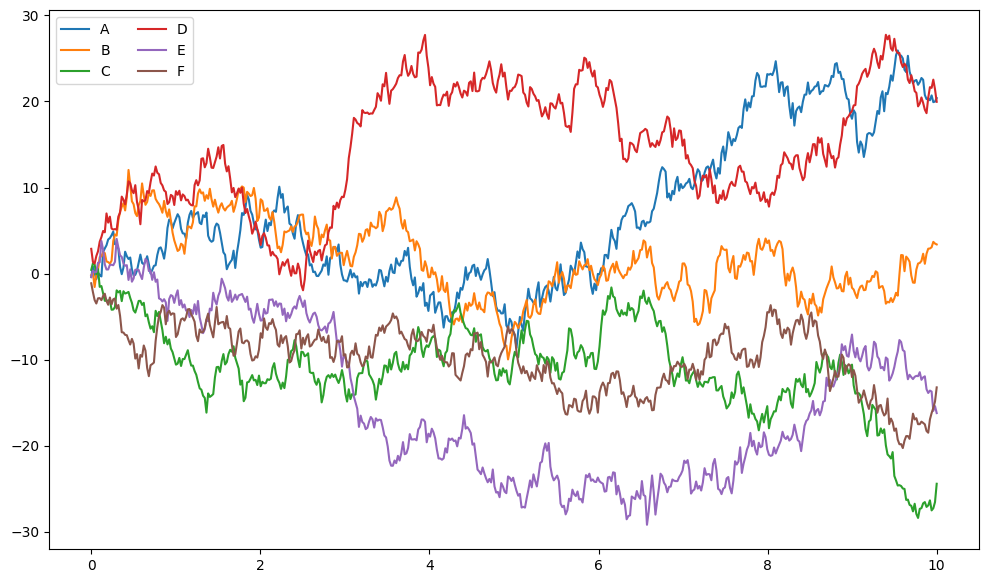

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

---

# Demo-2

In [9]:
# https://api.kraken.com/0/public/OHLC?pair=XBTUSD&interval=60&since=1704305938
def get_historic_price(symbol, after="2018-09-01"):
    url = "https://api.kraken.com/0/public/OHLC"
    pair = f"{symbol.upper()}USD"  # XBTUSD when symbol='xbt' for example

    resp = requests.get(
        url,
        params={
            "pair": pair,
            "interval": 60,
            "since": str(int(pd.Timestamp(after).timestamp())),
        },
    )
    resp.raise_for_status()

    data = resp.json()

    results_key = [k for k in data["result"].keys() if k != "last"][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count) in data["result"][
            results_key
        ]
    ]
    df = pd.DataFrame(
        results,
        columns=[
            "CloseTime",
            "OpenPrice",
            "HighPrice",
            "LowPrice",
            "ClosePrice",
            "Volume",
        ],
    )
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [3]:
last_week = pd.Timestamp.now() - pd.offsets.Day(7)
last_week

Timestamp('2024-01-03 18:18:58.152708')

In [8]:
btc = get_historic_price("btc", after=last_week)

1704305938


In [5]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-03 19:00:00,42295.8,42993.0,42212.6,42622.1,186.367519
2024-01-03 20:00:00,42615.8,42858.9,42582.3,42761.1,113.481515
2024-01-03 21:00:00,42746.3,42973.7,42608.7,42916.2,91.145601
2024-01-03 22:00:00,42916.2,42964.7,42650.1,42767.3,70.203314
2024-01-03 23:00:00,42767.3,42849.6,42649.5,42849.5,36.038142
